In [120]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, - Q=Queenstown

# Titanic의 결측값 확인하고 처리하기


In [121]:
df = pd.read_csv("./dataset/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [123]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [124]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [125]:
df.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

In [126]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [127]:
# titanic DataFrame에 결측값 확인하기!

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [128]:
import missingno as msno

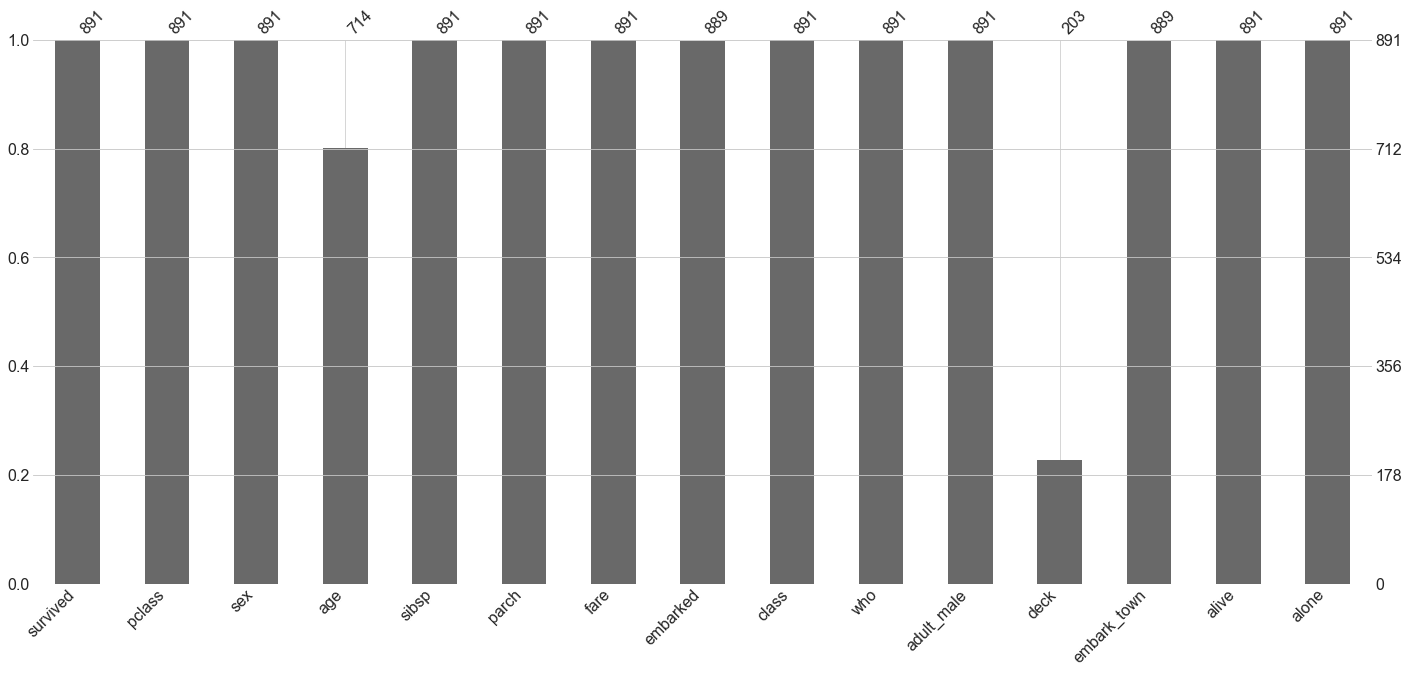

In [129]:
# 데이터 시각화를 이용한 결측값 확인
msno.bar(df)
plt.show()

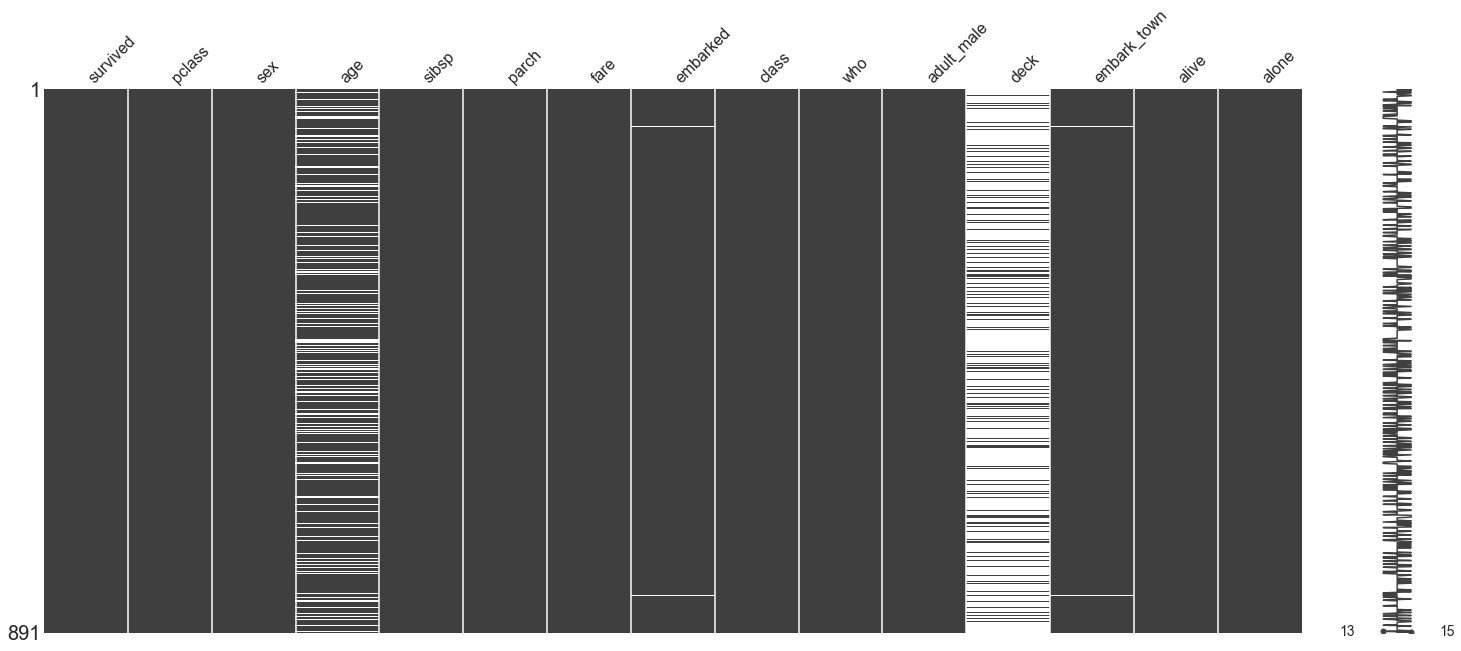

In [130]:
msno.matrix(df)
plt.show()

In [131]:
# deck 컬럼 삭제

df.drop(["deck"], axis=1, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [132]:
# age 결측치를 age평균으로 변환

df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
dtype: object

In [133]:
# age의 결측치를 평균값으로 변환

df.fillna({"age":df["age"].mean()}, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [134]:
# age의 float타입을 int타입으로 변환

df = df.astype({"age":int})
df.dtypes

survived         int64
pclass           int64
sex             object
age              int32
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
embark_town     object
alive           object
alone             bool
dtype: object

In [135]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [136]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [137]:
# embarked, embark_town 이 컬럼들의 결측치를 최빈값으로 대체하기!
# embarked 최빈값 확인

df["embarked"].mode()[0]


'S'

In [138]:
# embarked컬럼의 결측치 최빈값으로 대체

df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [139]:
# embark_townd의 최빈값 확인

df["embark_town"].mode()[0]

'Southampton'

In [140]:
# embark_town의 결측치를 최빈값으로 대체

df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [141]:
# titanic의 결측값 확인

df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int32  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int32(1), int64(4), object(6)
memory usage: 81.9+ KB


# Titanic 분석하기


- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, - Q=Queenstown

In [143]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [144]:
# 생존여부, 승객등급 groupby하기!

df1 = df.groupby(["survived", "pclass"])

In [145]:
# size()함수를 통해 생존여부, 승객등급별 데이터 개수 확인

df1.size()

survived  pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [146]:
# DataFrame에 담기

lee = pd.DataFrame(df1.size())
lee

0
survived pclass     
0        1        80
         2        97
         3       372
1        1       136
         2        87
         3       119

In [147]:
lee.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, (0, 1) to (1, 3)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int64
dtypes: int64(1)
memory usage: 292.0 bytes


In [148]:
lee.rename(columns = {0 : "counts"}, inplace=True)

In [149]:
lee.columns

Index(['counts'], dtype='object')

In [150]:
lee

counts
survived pclass        
0        1           80
         2           97
         3          372
1        1          136
         2           87
         3          119

In [151]:
# 위에 만들어진 DataFrame을 pivot테이블로 만들기
# 등급별 산사람,죽은사람 인원파악

table = lee.pivot_table(values="counts", columns=["survived", "pclass"])
table

survived   0             1         
pclass     1   2    3    1   2    3
counts    80  97  372  136  87  119

- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, - Q=Queenstown

In [152]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [116]:
df[["survived", "age"]]

,survived,age
0,0,22
1,1,38
2,1,26
3,1,35
4,0,35
...,...,...
886,0,27
887,1,19
888,0,29
889,1,26


In [166]:
sur = df["survived"] ==1

In [169]:
df["age"[sur]]

TypeError: string indices must be integers

In [170]:
# survived 1인 사람들의 평균나이구하는데 실패...

In [171]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [175]:
df[["survived", "sex"]].count()

survived    891
sex         891
dtype: int64

In [208]:
# 성별에따른 죽은사람과 산사람 인원파악 

table1 = pd.DataFrame(df[["sex", "survived"]].value_counts())
table1

,,0
sex,survived,
male,0,468
female,1,233
male,1,109
female,0,81


In [209]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, ('male', 0) to ('female', 0)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4 non-null      int64
dtypes: int64(1)
memory usage: 181.0+ bytes


In [210]:
table1.index

MultiIndex([(  'male', 0),
            ('female', 1),
            (  'male', 1),
            ('female', 0)],
           names=['sex', 'survived'])

In [211]:
# 0이라는 컬럼을 counts로 바꾸기

table1.rename(columns = {0 : "count"}, inplace=True)
table1

,,count
sex,survived,
male,0,468
female,1,233
male,1,109
female,0,81


In [212]:
# 피봇테이블로 변환하기
# 성별에 따른 죽은사람과 산사람 인원 보기

table1 = table1.pivot_table(values="count", columns=["survived", "sex"])
table1

survived      0           1     
sex      female male female male
count        81  468    233  109

In [215]:
table1.info

<bound method DataFrame.info of survived      0           1     
sex      female male female male
count        81  468    233  109>

- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, - Q=Queenstown

In [216]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [219]:
v = df[["survived", "alone"]].value_counts()

In [220]:
# 혼자올때 같이올때 산사람 죽은사람 파악해 보려 
# 했으나 이상한 결과값..??


pd.DataFrame(v)

,,0
survived,alone,
0,True,374
1,False,179
0,False,175
1,True,163


In [250]:
# survived가 1이고 alone 이 True인값을 v1에 담기

v1 = (df["survived"]==1) & (df["alone"]==True)
type(v1)

pandas.core.series.Series

In [256]:

pd.DataFrame(v1.value_counts())

,0
False,728
True,163


- survived : 생존=1, 죽음=0
- pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- sibsp : 함께 탑승한 형제 또는 배우자 수
- parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhampton, C=Cherbourg, - Q=Queenstown

In [257]:
df 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [259]:
# 탑승장소(도시별) 승객클래스 확인

v2 = df.groupby(["pclass", "embarked"])

In [260]:
#  groupby로 묶어서 도시별 등급 인원수파악
# S=Southhampton, C=Cherbourg,  Q=Queenstown

v2.size()

pclass  embarked
1       C            85
        Q             2
        S           129
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
dtype: int64

In [263]:
v2 = pd.DataFrame(v2.size())

In [264]:
# 컬럼명이 0인것을 count로 변환하기

v2.rename(columns = {0 : "count"}, inplace=True)
v2

count
pclass embarked       
1      C            85
       Q             2
       S           129
2      C            17
       Q             3
       S           164
3      C            66
       Q            72
       S           353

In [265]:
# 피봇테이블로 만들기
# S=Southhampton, C=Cherbourg,  Q=Queenstown


v2 = v2.pivot_table(values="count", columns=["pclass", "embarked"])
v2

pclass     1           2           3         
embarked   C  Q    S   C  Q    S   C   Q    S
count     85  2  129  17  3  164  66  72  353

# 하지못한것..

- pclass(등급)별로 평균나이대를 구하고 싶었으나 실패

- survived==1(살아남은사람)의 평균나이대를 구하고 싶었으나 실패..

- 수업 개인자습시간에 pivot table을 시각화 하고 싶었는데 실패..

# 더 분석하고싶은 것

- 등급별 나이별로 요금이 얼마나 다른것인가 분석해보고싶음

# 데이터 시각화 